In [1]:
import edi_pyagnostics.edirequest as dia
import pandas as pd
import numpy as np

In [2]:
new = dia.load_new_request('2020-12-02', '2020-12-31')

In [3]:
old = dia.load_archived()

In [18]:
jrndf = pd.concat([old, new])
jrndf

,date,pkgid,action
0,2015-04-17T14:42:05.936,2100011003,createDataPackage
1,2015-04-17T15:43:26.172,210120002,createDataPackage
2,2015-04-17T15:43:26.771,2100392001,createDataPackage
3,2015-04-17T15:43:41.508,2100169002,createDataPackage
4,2015-04-17T15:43:45.55,2100010001,createDataPackage
...,...,...,...
293,2020-12-17T17:22:47.672,210548009,updateDataPackage
294,2020-12-17T17:23:45.75,210548039,updateDataPackage
295,2020-12-17T17:29:05.003,210548069,updateDataPackage
296,2020-12-17T17:29:50.171,210548084,updateDataPackage


In [19]:
jrndf = dia.get_counts(jrndf)

In [20]:
jrn = dia.counts_to_daily(df, startdt='2020-01-01')
jrn

,n_update,n_create,n_tot
date,,,
2020-01-07,3,0,0
2020-01-08,2,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
2020-01-11,0,0,0
...,...,...,...
2020-12-13,0,0,0
2020-12-14,1,0,0
2020-12-15,90,0,0


In [10]:
nwtdf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-nwt')
nwtdf = dia.get_counts(nwtdf)
nwt = dia.counts_to_daily(nwtdf, startdt='2020-01-01')
nwt

,n_update,n_create,n_tot
date,,,
2020-01-08,1,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
2020-01-11,0,0,0
2020-01-12,0,0,0
...,...,...,...
2020-11-15,0,0,0
2020-11-16,1,0,0
2020-11-17,1,0,0


In [11]:
sevdf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-sev')
sevdf = dia.get_counts(sevdf)
sev = dia.counts_to_daily(sevdf, startdt='2020-01-01')
sev

,n_update,n_create,n_tot
date,,,
2020-02-28,1,0,0
2020-02-29,0,0,0
2020-03-01,0,0,0
2020-03-02,0,0,0
2020-03-03,0,0,0
...,...,...,...
2020-09-26,0,0,0
2020-09-27,0,0,0
2020-09-28,0,0,0


In [12]:
mcmdf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-mcm')
mcmdf = dia.get_counts(mcmdf)
mcm = dia.counts_to_daily(mcmdf, startdt='2020-01-01')
mcm

,n_update,n_create,n_tot
date,,,
2020-01-06,2,0,0
2020-01-07,0,0,0
2020-01-08,0,0,0
2020-01-09,0,0,0
2020-01-10,0,0,0
...,...,...,...
2020-12-11,0,0,0
2020-12-12,0,0,0
2020-12-13,0,0,0


In [13]:
capdf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-cap')
capdf = dia.get_counts(capdf)
cap = dia.counts_to_daily(capdf, startdt='2020-01-01')
cap

,n_update,n_create,n_tot
date,,,
2020-01-23,0,1,1
2020-01-24,1,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
2020-01-27,0,0,0
...,...,...,...
2020-12-14,0,0,0
2020-12-15,0,0,0
2020-12-16,0,1,1


In [31]:
cdrdf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-cdr')
cdrdf = dia.get_counts(cdrdf)
cdr = dia.counts_to_daily(cdrdf, startdt='2020-01-01')
cdr

,n_update,n_create,n_tot
date,,,
2020-10-06,0,2,2
2020-10-07,0,0,0
2020-10-08,0,2,2
2020-10-09,0,0,0
2020-10-10,0,0,0
...,...,...,...
2020-12-26,0,0,0
2020-12-27,0,0,0
2020-12-28,0,0,0


In [43]:
ntldf = dia.load_new_request('2020-01-01', '2020-12-31', scope='knb-lter-ntl')
ntldf = dia.get_counts(ntldf)
ntl = dia.counts_to_daily(ntldf, startdt='2020-01-01')
ntl

,n_update,n_create,n_tot
date,,,
2020-01-02,1,0,0
2020-01-03,0,0,0
2020-01-04,0,0,0
2020-01-05,0,0,0
2020-01-06,1,0,0
...,...,...,...
2020-12-02,0,0,0
2020-12-03,0,1,1
2020-12-04,0,0,0


## Plot activity since last report (2020-01-01)


In [14]:
import matplotlib
import matplotlib.pyplot as plt
# Figure config
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

# Get a datestamp for saving figures
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")

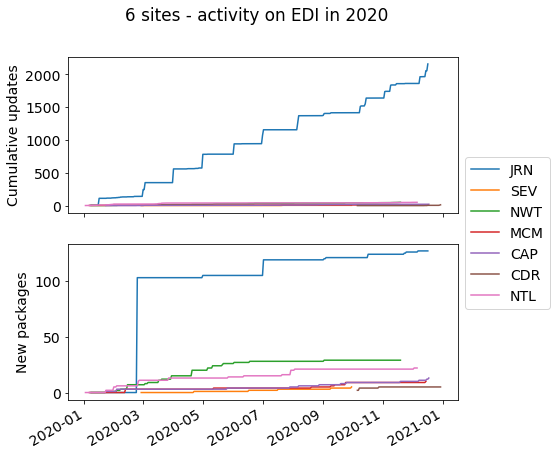

In [45]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

#ax[0].plot(jrn.index, jrn.n_update, label='Update pkg')
#ax[0].plot(daily.index, dfs.n_create, label='Create pkg')
#ax[0].set_ylabel('JRN events')

ax[0].plot(jrn.index, jrn.n_update.cumsum(), label='JRN')
ax[0].plot(sev.index, sev.n_update.cumsum(), label='SEV')
ax[0].plot(nwt.index, nwt.n_update.cumsum(), label='NWT')
ax[0].plot(mcm.index, mcm.n_update.cumsum(), label='MCM')
ax[0].plot(cap.index, cap.n_update.cumsum(), label='CAP')
ax[0].plot(cdr.index, cdr.n_update.cumsum(), label='CDR')
ax[0].plot(ntl.index, ntl.n_update.cumsum(), label='NTL')
ax[0].set_ylabel('Cumulative updates')

ax[1].plot(jrn.index, jrn.n_create.cumsum(), label='JRN')
ax[1].plot(sev.index, sev.n_create.cumsum(), label='SEV')
ax[1].plot(nwt.index, nwt.n_create.cumsum(), label='NWT')
ax[1].plot(mcm.index, mcm.n_create.cumsum(), label='MCM')
ax[1].plot(cap.index, cap.n_create.cumsum(), label='CAP')
ax[1].plot(cdr.index, cdr.n_create.cumsum(), label='CDR')
ax[1].plot(ntl.index, ntl.n_create.cumsum(), label='NTL')

plt.ylabel('New packages')
fig.autofmt_xdate()
plt.suptitle('6 sites - activity on EDI in 2020')
plt.legend(bbox_to_anchor=(1,1.6), loc="upper left")

import os
fig.savefig(os.path.expanduser("/Users/gmaurer/GD_gmaurer.jrn.lter/IM/figures/LTERcomp_EDI_2020_{0}.png".format(now)),
            dpi=150)

In [21]:
nomet = np.logical_and(jrndf.studyid!='437', jrndf.studyid!='548')
jrn_nomet = dia.counts_to_daily(jrndf.loc[nomet], startdt='2020-01-01')

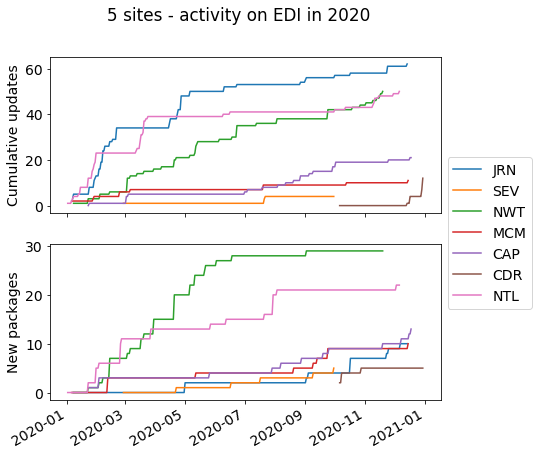

In [47]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

#ax[0].plot(jrn.index, jrn.n_update, label='Update pkg')
#ax[0].plot(daily.index, dfs.n_create, label='Create pkg')
#ax[0].set_ylabel('JRN events')

ax[0].plot(jrn_nomet.index, jrn_nomet.n_update.cumsum(), label='JRN')
ax[0].plot(sev.index, sev.n_update.cumsum(), label='SEV')
ax[0].plot(nwt.index, nwt.n_update.cumsum(), label='NWT')
ax[0].plot(mcm.index, mcm.n_update.cumsum(), label='MCM')
ax[0].plot(cap.index, cap.n_update.cumsum(), label='CAP')
ax[0].plot(cdr.index, cdr.n_update.cumsum(), label='CDR')
ax[0].plot(ntl.index, ntl.n_update.cumsum(), label='NTL')
ax[0].set_ylabel('Cumulative updates')

ax[1].plot(jrn_nomet.index, jrn_nomet.n_create.cumsum(), label='JRN')
ax[1].plot(sev.index, sev.n_create.cumsum(), label='SEV')
ax[1].plot(nwt.index, nwt.n_create.cumsum(), label='NWT')
ax[1].plot(mcm.index, mcm.n_create.cumsum(), label='MCM')
ax[1].plot(cap.index, cap.n_create.cumsum(), label='CAP')
ax[1].plot(cdr.index, cdr.n_create.cumsum(), label='CDR')
ax[1].plot(ntl.index, ntl.n_create.cumsum(), label='NTL')

plt.legend(bbox_to_anchor=(1,1.6), loc="upper left")
plt.ylabel('New packages')
fig.autofmt_xdate()
plt.suptitle('5 sites - activity on EDI in 2020')

import os
fig.savefig(os.path.expanduser("/Users/gmaurer/GD_gmaurer.jrn.lter/IM/figures/LTERcomp_EDI_2020_JRNnomet_{0}.png".format(now)),
            dpi=150)

### Total number of packages

In [119]:
daily.n_create.sum()

127